In [152]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [153]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [154]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [155]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [156]:
bos.columns=boston.feature_names

In [157]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [158]:
bos['MEDV']=boston.target

In [159]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Check dataframe conatins null value or not

In [160]:
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Hurrey!
##### We don't have any null value in our data set

## Check datatype of each columns

In [161]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Again Hurrey!

Each columns datatype are correct hence we don't need to type cast any column. In case if we have categorical attribute then we need to convert that column into numerical column using OneHotEncoding or Dummyvariable or OrdinalEncoder. But in our case we don't have any categorical column. We can proceed.

In [162]:
bos.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


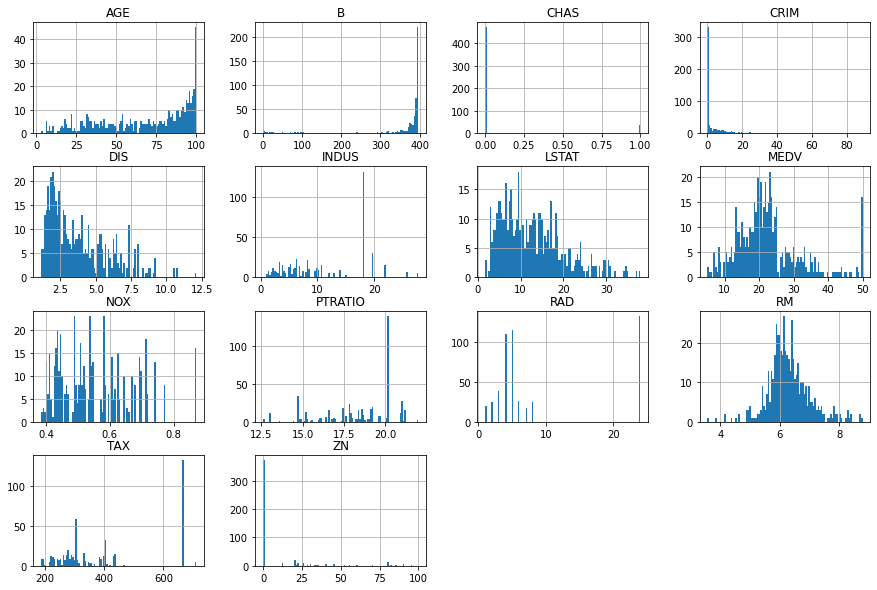

In [163]:

bos.hist(figsize=(15,10),bins=100)
plt.show()

In [164]:
import seaborn as sns

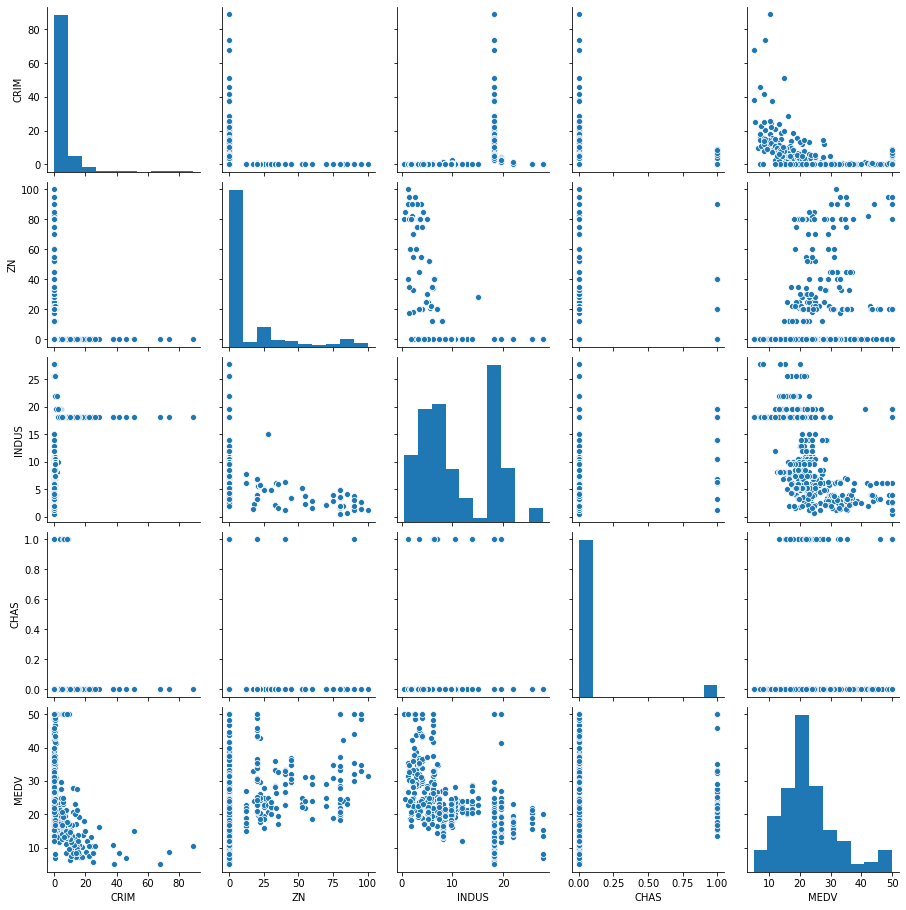

In [165]:
sns.pairplot(bos.iloc[:,[0,1,2,3,13]])

CRIM: as crime proportion increases MEDV value decrese there is negetive correlation hence this feature may contribute to the prediction.

ZN: Although there is few exception but as ZN proportion increses MEDV value increses hence this feature may contribute to the prediction.

INDUS: Proportion of non retail business increses MEDV descreases hence there is a small negative correlation exist hence we will select this feature as well

CHAS: As per our current observation we will keep this feature but we will decide later whether we should keep this column or not

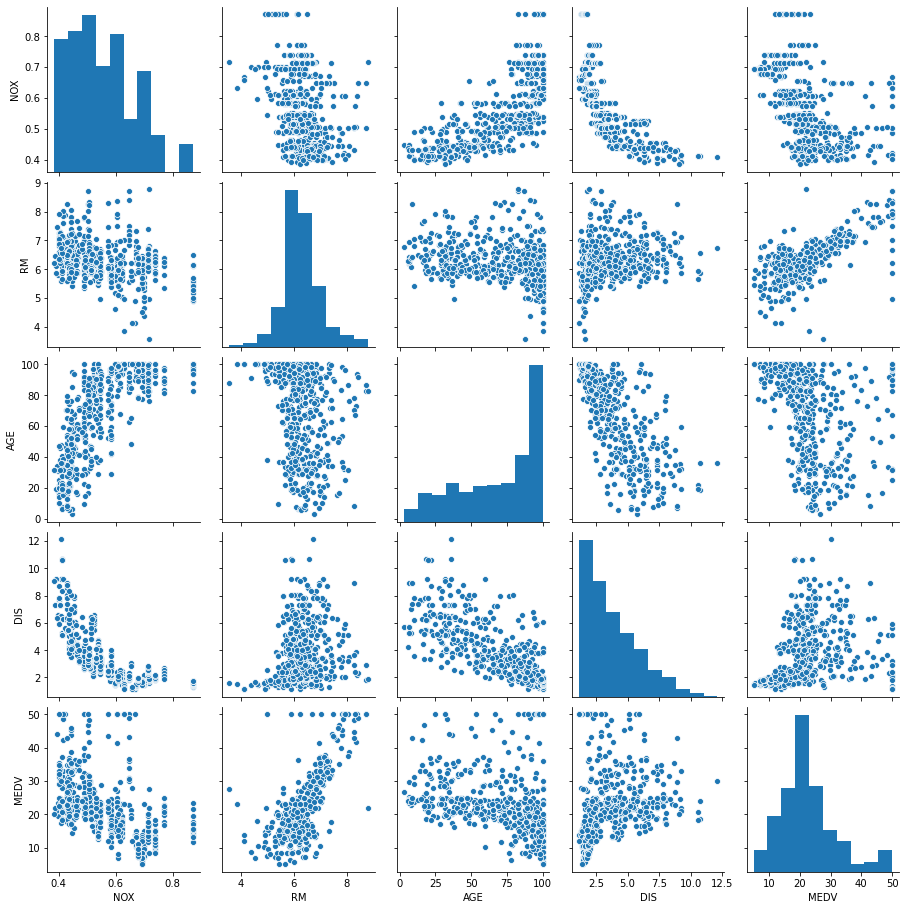

In [166]:
sns.pairplot(bos.iloc[:,[4,5,6,7,13]])

NOX: There is a  -ve correlation, we will keep this feature as well.

RM: There is +ve correlation, we will keep this feature as well. 

AGE: There is a  -ve correlation, we will keep this feature as well.

DIS: long distance has higher MEDV as compare to lower we will keep this feature as well.

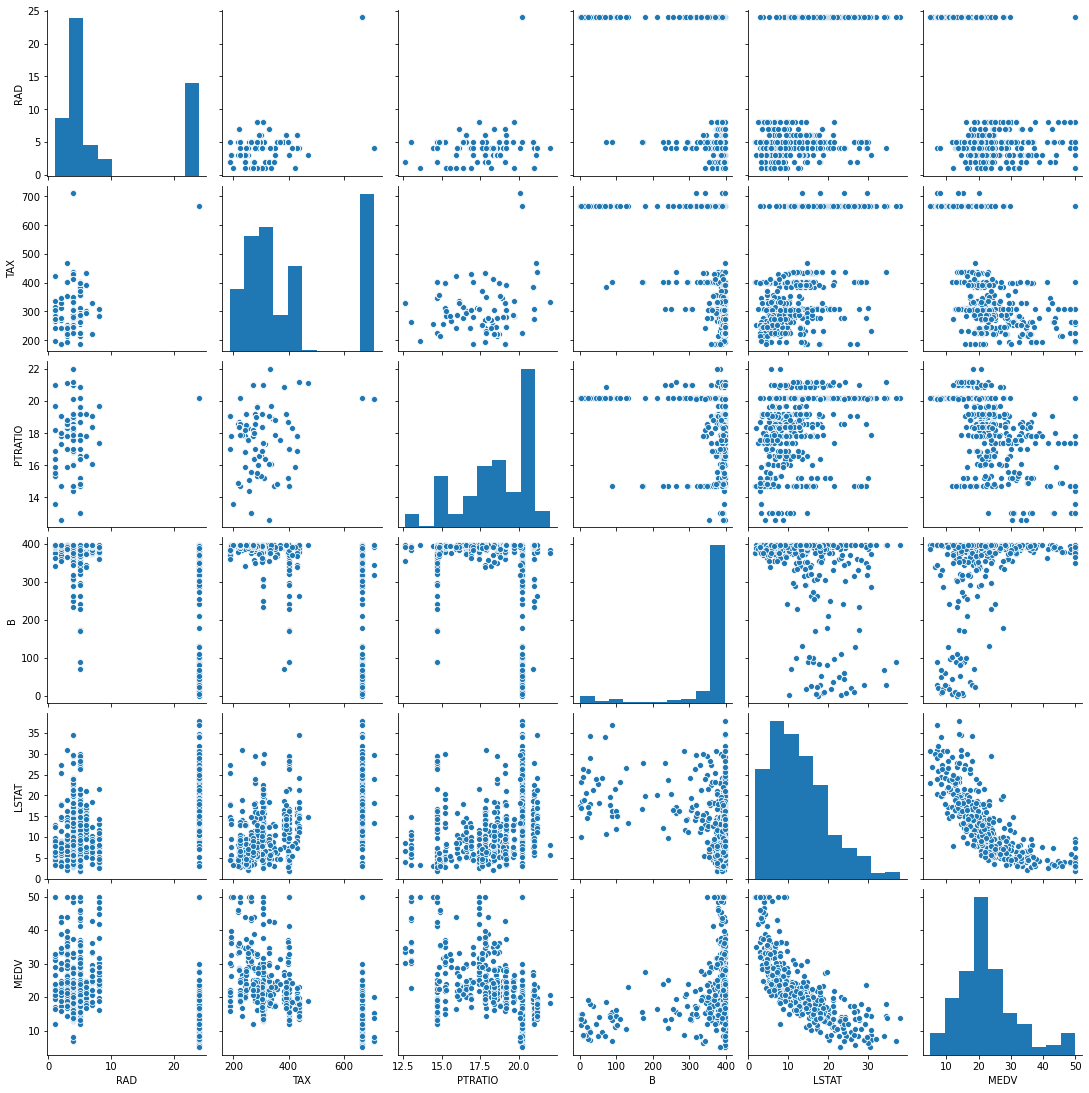

In [167]:
sns.pairplot(bos.iloc[:,[8,9,10,11,12,13]])

RAD, TAX and PTRATIO seem to not have strong correlation.

B has small +ve correlation and LSTAT is -ve correlation

## first we will perform Standard Scaling on input features

In [168]:
X,y=bos.iloc[:,:13],bos[['MEDV']]

In [169]:

from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [171]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
scale=StandardScaler()

In [174]:
scale.fit(X_train)

StandardScaler()

In [175]:
X_train_scaled=scale.transform(X_train)

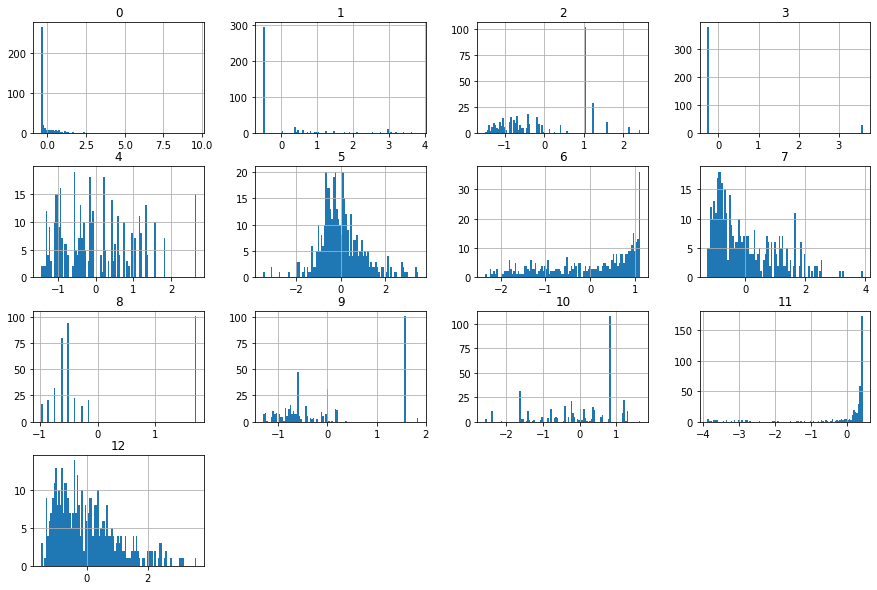

In [176]:
pd.DataFrame(X_train_scaled).hist(bins=100,figsize=(15,10))
plt.show()

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
lr=LinearRegression()

In [179]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [180]:
lr.coef_

array([[-1.00213533,  0.69626862,  0.27806485,  0.7187384 , -2.0223194 ,
         3.14523956, -0.17604788, -3.0819076 ,  2.25140666, -1.76701378,
        -2.03775151,  1.12956831, -3.61165842]])

In [181]:
lr.intercept_

array([22.79653465])

In [182]:
yhat=lr.predict(X_train_scaled)

Text(0, 0.5, 'predicted value')

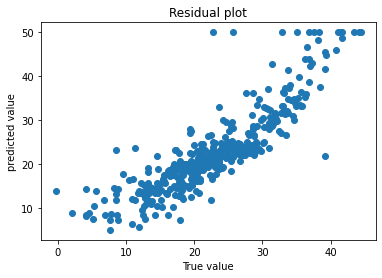

In [183]:
plt.title("Residual plot")
plt.scatter(pd.DataFrame(yhat),y_train)
plt.xlabel("True value")
plt.ylabel("predicted value")

In [184]:
from sklearn.metrics import r2_score

In [185]:
r2_score(y_train,pd.DataFrame(yhat))

0.7508856358979673

In [186]:
X_test_scaled=scale.transform(X_test)

In [187]:
yhat_test=lr.predict(X_test_scaled)

0.668759493535632

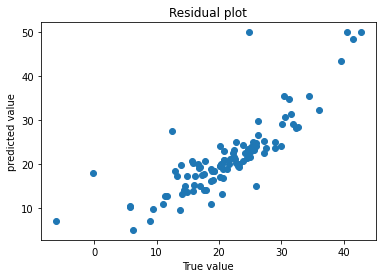

In [188]:
plt.title("Residual plot")
plt.scatter(pd.DataFrame(yhat_test),y_test)
plt.xlabel("True value")
plt.ylabel("predicted value")
r2_score(y_test,pd.DataFrame(yhat_test))

In [189]:
r2_score(y_test,pd.DataFrame(yhat_test))

0.668759493535632

As we have observered that training accuracy is quite high and testing quite low this is an example of overfitting.

Let's discuss the reason behind it.

1) It may be possible that our created model is more complex and it captured the noise in our dataset.
2) Our data is not quite good may need few preprocessing step.


In [190]:
from pandas.plotting import scatter_matrix

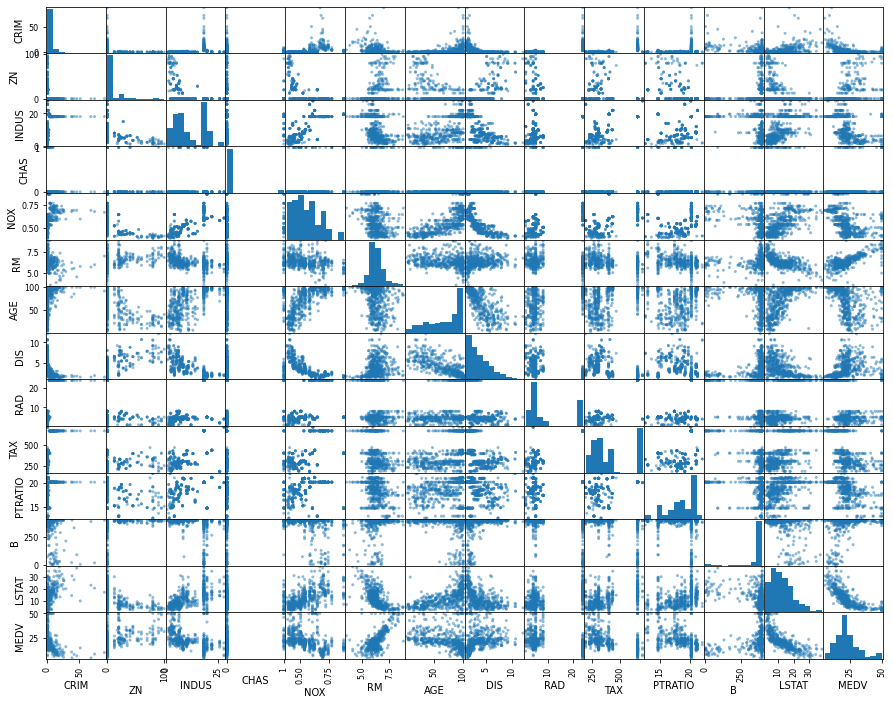

In [191]:
scatter_matrix(bos,figsize=(15,12))
plt.show()

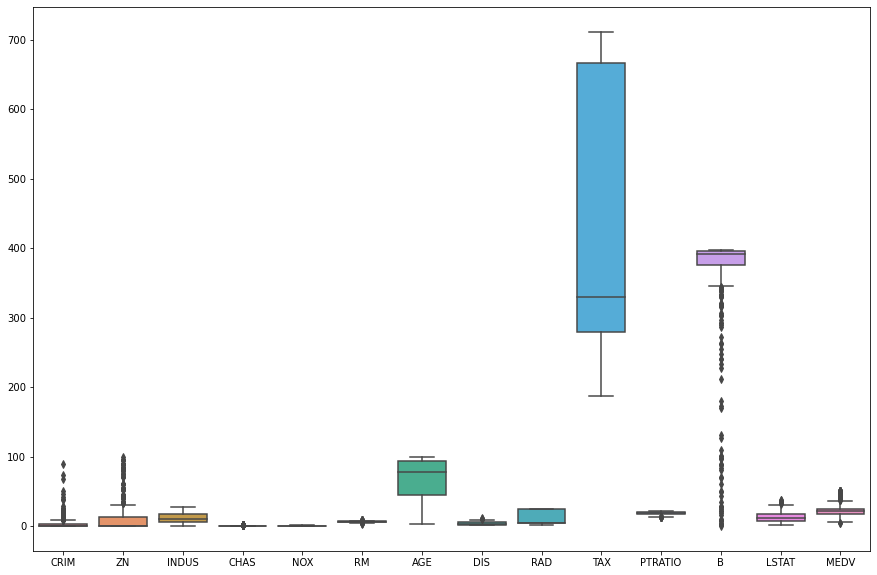

In [192]:
plt.figure(figsize=(15,10))
sns.boxplot(data=bos)

In [193]:
#from above box plot we can see that we have so many outliers

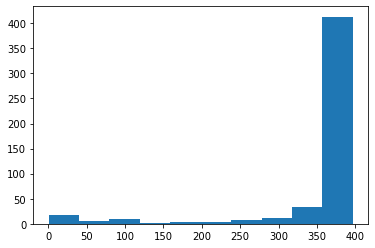

In [194]:
plt.hist(x=bos['B'])
plt.show()

In [195]:
bos_backup=bos

In [196]:
#removing outlier
q=bos['B'].quantile(0.2)

In [197]:
q

364.31

In [198]:
bos=bos[bos['B']>q]

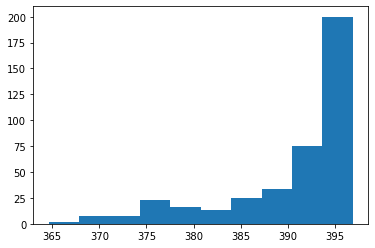

In [199]:
plt.hist(x=bos['B'],bins=10)
plt.show()

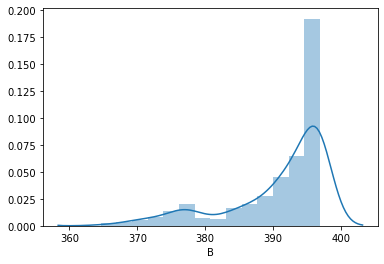

In [200]:
sns.distplot(bos['B'])

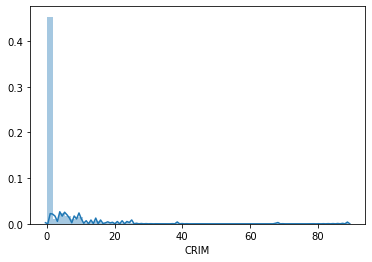

In [201]:
sns.distplot(bos['CRIM'])

In [202]:
# our data has some skewness let's make it proper

In [203]:
q=bos['CRIM'].quantile(0.95)

In [204]:
q

12.85051999999995

In [205]:
bos=bos[bos['CRIM']<q]

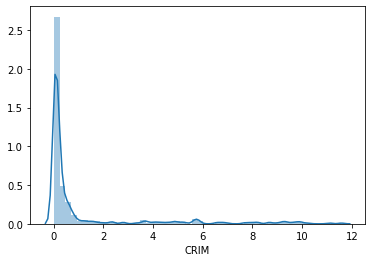

In [206]:
sns.distplot(bos['CRIM'])

In [207]:
bos.shape

(383, 14)

(array([318.,  11.,   5.,  10.,  12.,   6.,   4.,   7.,   8.,   2.]),
 array([6.3200000e-03, 1.1634780e+00, 2.3206360e+00, 3.4777940e+00,
        4.6349520e+00, 5.7921100e+00, 6.9492680e+00, 8.1064260e+00,
        9.2635840e+00, 1.0420742e+01, 1.1577900e+01]),
 <a list of 10 Patch objects>)

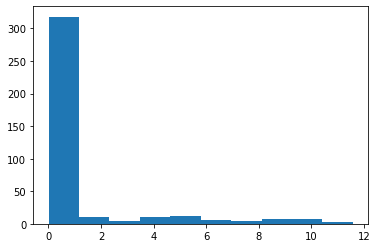

In [208]:
plt.hist(bos['CRIM'])

let's analyze correlation  using heatmap

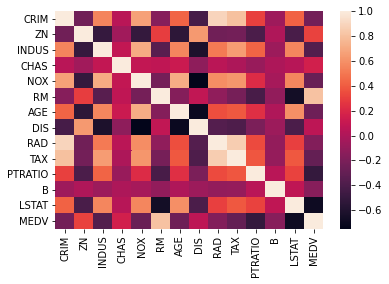

In [209]:
sns.heatmap(bos.corr())

In [210]:
corr=(bos.corr()<-0.8).iloc[:,0]

In [211]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.248522,0.551789,0.048044,0.665838,-0.156878,0.431706,-0.424571,0.895420,0.808256,0.309367,-0.059788,0.421250,-0.232237
ZN,-0.248522,1.000000,-0.495963,-0.048998,-0.508153,0.295990,-0.537815,0.633039,-0.248017,-0.230596,-0.400821,0.009194,-0.407120,0.312235
INDUS,0.551789,-0.495963,1.000000,0.091354,0.711294,-0.346205,0.558385,-0.617919,0.514818,0.650086,0.431780,-0.067731,0.557106,-0.370701
CHAS,0.048044,-0.048998,0.091354,1.000000,0.086368,0.072094,0.124935,-0.124783,0.055561,-0.001072,-0.081722,-0.002943,0.038007,0.157298
NOX,0.665838,-0.508153,0.711294,0.086368,1.000000,-0.224757,0.717850,-0.747915,0.587857,0.623461,0.219631,-0.025922,0.559058,-0.271172
RM,-0.156878,0.295990,-0.346205,0.072094,-0.224757,1.000000,-0.162629,0.080609,-0.115254,-0.219417,-0.416787,-0.109877,-0.654551,0.811679
AGE,0.431706,-0.537815,0.558385,0.124935,0.717850,-0.162629,1.000000,-0.699922,0.352390,0.387437,0.241018,0.006763,0.591320,-0.252052
DIS,-0.424571,0.633039,-0.617919,-0.124783,-0.747915,0.080609,-0.699922,1.000000,-0.363142,-0.387647,-0.195594,-0.071754,-0.401491,0.068026
RAD,0.895420,-0.248017,0.514818,0.055561,0.587857,-0.115254,0.352390,-0.363142,1.000000,0.859067,0.342980,-0.105522,0.300311,-0.170000
TAX,0.808256,-0.230596,0.650086,-0.001072,0.623461,-0.219417,0.387437,-0.387647,0.859067,1.000000,0.384093,-0.093063,0.386988,-0.296213


(306, 13) (77, 13) (306, 1) (77, 1)


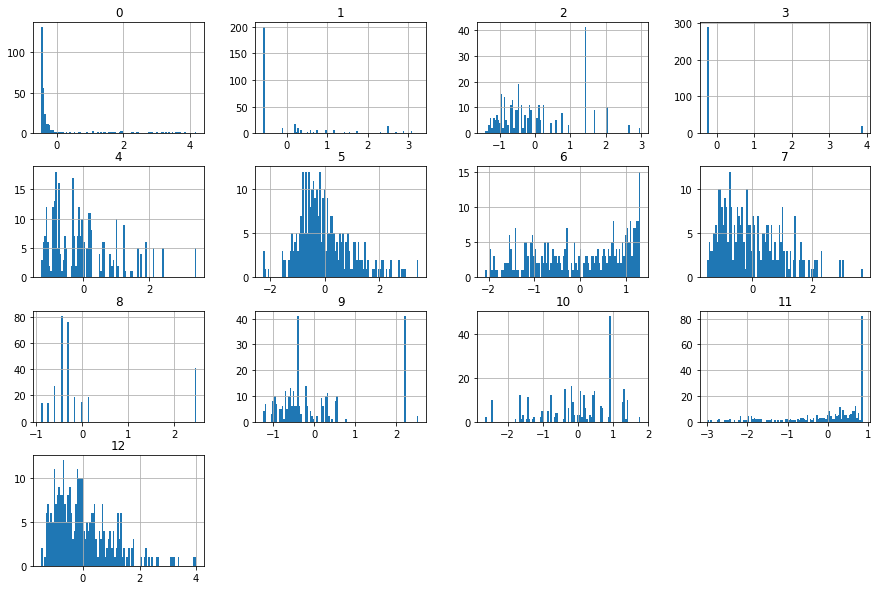

Text(0, 0.5, 'predicted value')

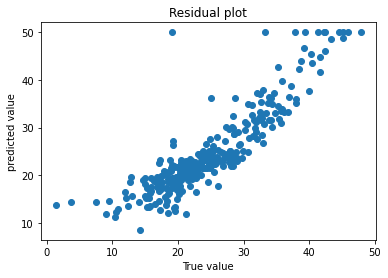

In [212]:
X,y=bos.iloc[:,:13],bos[['MEDV']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X_train)
X_train_scaled=scale.transform(X_train)
pd.DataFrame(X_train_scaled).hist(bins=100,figsize=(15,10))
plt.show()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
lr.coef_
lr.intercept_
yhat=lr.predict(X_train_scaled)
plt.title("Residual plot")
plt.scatter(pd.DataFrame(yhat),y_train)
plt.xlabel("True value")
plt.ylabel("predicted value")

training accuracy 0.7886653341556141
testing accuracy 0.6988608066441595


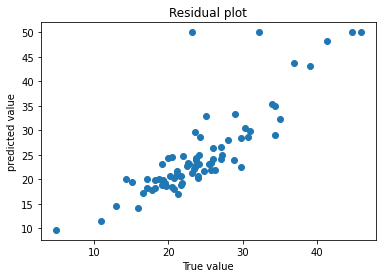

In [213]:
from sklearn.metrics import r2_score
print("training accuracy",r2_score(y_train,pd.DataFrame(yhat)))

X_test_scaled=scale.transform(X_test)
yhat_test=lr.predict(X_test_scaled)
plt.title("Residual plot")
plt.scatter(pd.DataFrame(yhat_test),y_test)
plt.xlabel("True value")
plt.ylabel("predicted value")
print("testing accuracy",r2_score(y_test,pd.DataFrame(yhat_test)))

In [214]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_train_scaled[:,1:]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns[1:]

In [215]:
required_column=vif[vif['VIF']<5].Features

In [216]:
required_column=[ 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', ]

In [217]:
X=X[required_column]
X.shape,y.shape

((383, 12), (383, 1))

In [218]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [219]:
X_train_scaled=scale.fit_transform(X_train)

In [220]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_train_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [221]:
vif

,VIF,Features
0,2.255160,ZN
1,3.327331,INDUS
2,1.069719,CHAS
3,4.341801,NOX
4,2.559025,RM
5,3.007103,AGE
6,3.710216,DIS
7,4.518564,RAD
8,5.714753,TAX
9,1.710128,PTRATIO


#as VIF is more than 5 for columns CRIM and RAD and TAX we will drop

In [222]:
X_test_scaled=scale.transform(X_test)

In [223]:
print(X_train_scaled.shape,y_train.shape,X_test_scaled.shape,y_test.shape)

(306, 12) (306, 1) (77, 12) (77, 1)


In [224]:
lr=LinearRegression()

In [225]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [226]:
yhat=lr.predict(X_train_scaled)

In [227]:
r2_score(y_train,yhat)

0.7855302593089077

In [228]:
yhat_test=lr.predict(X_test_scaled)

In [229]:
r2_score(y_test,yhat_test)

0.7175538806223766

In [230]:
# let's use regularization now to rediuce variance of model

In [231]:
from sklearn.linear_model import RidgeCV

In [232]:
ridge=RidgeCV()

In [233]:
ridge.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [234]:
ridge.alpha_

10.0

In [235]:
yhat=ridge.predict(X_train_scaled)

In [236]:
r2_score(y_train,yhat)

0.7848098960137

In [237]:
yhat_test=ridge.predict(X_test_scaled)

In [238]:
r2_score(y_test,yhat_test)

0.7144782723094564

In [239]:
#still we are not getting high accuracy let use more complex model

In [240]:
from sklearn.linear_model import LassoCV

In [339]:
lasso=LassoCV()

In [340]:
lasso.fit(X_train_scaled,y_train)

LassoCV()

In [341]:
lasso.alpha_

0.007148529892681759

In [342]:
yhat=lasso.predict(X_train_scaled)

In [343]:
r2_score(y_train,yhat)

0.7854985335708938

In [344]:
yhat_test=lasso.predict(X_test_scaled)

In [345]:
r2_score(y_test,yhat_test)

0.71726023712283

Lasso model is quite better 

In [304]:
from sklearn.ensemble import RandomForestRegressor

In [305]:
rfr=RandomForestRegressor(n_estimators=500,min_samples_leaf=10,min_samples_split=10,max_depth=4)

In [306]:
rfr.fit(X_train_scaled,np.array(y_train).ravel())

RandomForestRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=500)

In [307]:
yhat=rfr.predict(X_train_scaled)

In [308]:
y_train=np.array(y_train).ravel()

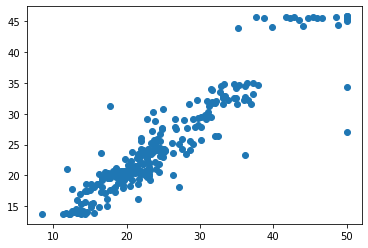

In [309]:
plt.plot(y_train,yhat,'o')

In [310]:
r2_score(y_train,yhat)

0.8699450314539418

In [311]:
yhat_test=rfr.predict(X_test_scaled)

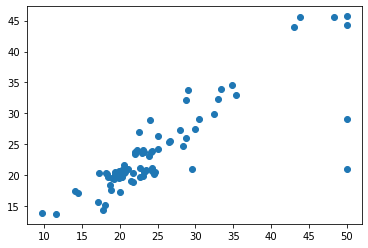

In [312]:
plt.plot(y_test,yhat_test,'o')

In [315]:
r2_score(y_test,yhat_test)

0.6977722863112137

Conclusion: Lasso is performing well as compare to other model

In [353]:
X=boston['data']

In [354]:
y=boston['target']

In [356]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [357]:
from sklearn.ensemble import GradientBoostingRegressor

In [385]:
gbr=GradientBoostingRegressor(n_estimators=150,)

In [386]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=150)

In [387]:
yhat=gbr.predict(X_train)

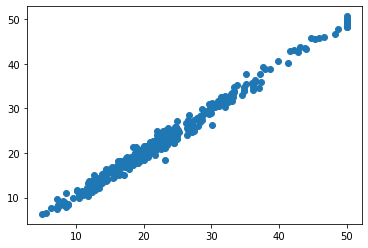

In [388]:
plt.plot(y_train,yhat,'o')

In [389]:
 r2_score(y_train,yhat)

0.9871820545268826

In [390]:
yhat_test=gbr.predict(X_test)

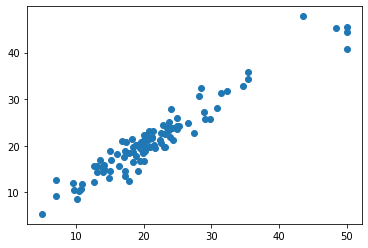

In [391]:
plt.plot(y_test,yhat_test,'o')

In [392]:
 r2_score(y_test,yhat_test)

0.9189702457046517